# <center>Gramener Case Study</center>
## <center>Risk Analytics In Banking & Financial Services</center>

## Goal
#### Identify  loan defaulter driving factor to manage risk.

<ul>
<li>Load and Cleanup Data</li>
<li>Analyze Data</li>
<li>Identify Defaulter Data Pattern using Univariate and Bivariate analysis</li>
<li>Pin point Driving Factor behind loan defaulter</li>
</ul>

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import platform
from dateutil.relativedelta import *

In [2]:
#Used Libraries Version
print("Python Version :", platform.python_version())
print("Numpy Version : ", np.__version__)
print("Pandas Version : ",pd.__version__)
print("Matplotlib Version : ",plt.matplotlib.__version__)
print("Seaborn Version : ",sns.__version__)

Python Version : 3.7.0
Numpy Version :  1.16.2
Pandas Version :  0.23.4
Matplotlib Version :  3.0.3
Seaborn Version :  0.9.0


In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

**Load Borrower's Loan Profile Data**

In [4]:
dfCust = pd.read_csv('DataSet/loan.csv')

In [5]:
#To display all colmuns
pd.set_option('display.max.column',111)

In [6]:
dfCust.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Cleaning the Data

- ### Inspect Null values

In [7]:
# Missing value check for Columns.
missingColValue = dfCust.isnull().sum() / dfCust.index.size * 100

In [8]:
print('100 % Missing Column Data Count : ', missingColValue[missingColValue == 100].size)
print('More than 20 % Missing Column Data Count : ', missingColValue[missingColValue >= 20].size)

100 % Missing Column Data Count :  54
More than 20 % Missing Column Data Count :  58


In [9]:
missingColValue[missingColValue >= 20]

desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

In [10]:
#Drop columns having more than 20% of missing data<BR>
dfCust.drop(columns= missingColValue[missingColValue>= 20].index, inplace=True)
dfCust.shape

(39717, 53)

In [11]:
missingColValue = dfCust.isnull().sum() / dfCust.index.size * 100
print('More than 20 % Missing Data Count : ', missingColValue[missingColValue >= 20].size)

More than 20 % Missing Data Count :  0


In [12]:
missingColValue[missingColValue >0]

emp_title                     6.191303
emp_length                    2.706650
title                         0.027696
revol_util                    0.125891
last_pymnt_d                  0.178765
last_credit_pull_d            0.005036
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
pub_rec_bankruptcies          1.754916
tax_liens                     0.098195
dtype: float64

In [13]:
missingRowValue = dfCust.isnull().sum(axis=1) / dfCust.columns.size* 100

In [14]:
print("Rows with atleast one missing value : " ,missingRowValue [missingRowValue > 0].size)

Rows with atleast one missing value :  3286


Currently we are not dropping any missing value rows 

In [15]:
print("Total available rows : ", dfCust.shape[0])

Total available rows :  39717


In [16]:
dfCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [17]:
dfCust.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Since the columns 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt' & 'tax_liens' have same values across rows, we will analyze the same. 

In [18]:
dfCust[['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].describe()

,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
count,39661.0,39717.0,39717.0,39661.0,39717.0,39678.0
mean,0.0,1.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.0,1.0,0.0,0.0,0.0,0.0
max,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
dfCust[['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens']].apply(pd.Series.value_counts)

,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0.0,39661.0,NaN,39717.0,39661.0,39717.0,39678.0
1.0,NaN,39717.0,NaN,NaN,NaN,NaN


- **collections_12_mths_ex_med, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens** : Only one unique value '0'(All row contain same value) 
- **policy_code** : Only one unique value '1' (All row contain same value) <BR><BR>
Since these columns have same values across rows, so we can drop these columns


In [20]:
dfCust.drop(columns=dfCust.describe().columns).describe()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,39706,39717,39717,39717,39667,39717,39646,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,14,19615,823,50,526,1089,1,101,106,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,Nov-98,0%,f,May-16,May-16,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,18641,2184,597,7099,370,977,39717,1256,10308,39717


Description of data frame for Categorical and Missing value columns.<br>
- **pymnt_plan** : Only one unique value **'1'** (All row contain same value) <br>
- **url** : All rows have different value so it will not help in any analysis. <br>
- **initial_list_status** : Only one unique value **'f'** (All row contain same value)  <br>
- **application_type** : Only one unique value **'INDIVIDUAL'** (All row contain same value)  <br>

So we can drop these 4 columns.


### Drop unecessary columns

In [21]:
colsToDrop = ['collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens','pymnt_plan','url','initial_list_status','application_type']
dfCust.drop(columns=colsToDrop, inplace=True)
dfCust.shape

(39717, 43)

In [22]:
# Check for Duplicate data rows
dfCust[dfCust.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [23]:
dfCust[dfCust.duplicated(subset=dfCust.columns[2:])]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


No duplicate data rows found. 

## Data Analysis

In [24]:
#Plotting correlation matrix for Quantitative Variables.
corr = dfCust.drop(columns=['id','member_id']).corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,0.317597,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,0.310392,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,0.290797,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,0.312679,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,0.279961,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,0.228743,0.229881,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691
delinq_2yrs,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,-0.055125,0.067892,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,0.091713,0.024802,-0.022381,0.111499,-0.012106,-0.011780,-0.010559,-0.020277,-0.023433,0.021774,0.031215,0.018972,0.012420,0.028514,0.016346
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.011656,0.091713,1.000000,0.000172,0.288964,0.686635,0.028688,0.028514,0.162663,0.152937,0.160631,0.124499,-0.018627,0.016396,0.006219,0.078865,0.005930
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.007463,0.024802,0.000172,1.000000,-0.061413,-0.023901,-0.012675,-0.012910,-0.053668,-0.054101,-0.065384,-0.007470,-0.002071,-0.005521,-0.005536,-0.032214,0.847305


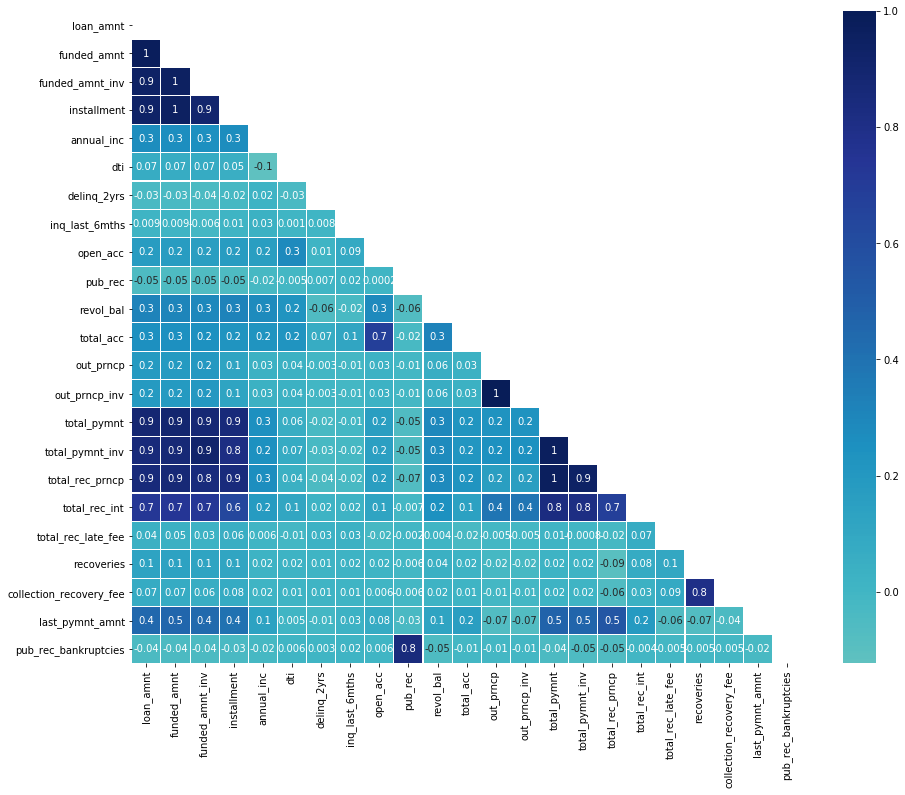

In [25]:
#Correlation matrix plot
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr,  cmap='YlGnBu', mask = mask, center=0, linewidths= 0.1, annot=True, fmt='.1g', ax=ax)

plt.show()

**We try to compare all quantitative variables to understand if there is any correlation between them.<br>
We conclude that we would need to analyse quantitative variables in conjunction with each of the key categorical variables.**

In [26]:
dfCust.pivot_table(values='funded_amnt', index=['loan_status'], columns=['term'], aggfunc='sum')

term,36 months,60 months
loan_status,,
Charged Off,29875775.0,36260600.0
Current,NaN,18793700.0
Fully Paid,245637350.0,104242900.0


In [27]:
dfCust.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Derived Variable

- Convert Interest Rate, Revol Utilization & Loan Term to numeric data type

In [57]:
dfCust['int_rate_num'] = pd.to_numeric(dfCust['int_rate'].apply(lambda x : x.strip('%')))
dfCust['revol_util_num'] = pd.to_numeric(dfCust['revol_util'].apply(lambda x : x.strip('%') if type(x) == type('') else x ))
dfCust['term_num'] = pd.to_numeric(dfCust['term'].apply(lambda x : x.strip('months')))

In [29]:
dfCust['revol_util_num'].fillna(value=0, inplace=True)

- Derive Monthly Income & Income Vs Loan funded ratio

In [30]:
dfCust['monthly_inc'] = dfCust['annual_inc'] / 12
dfCust['IncomeVsLoan'] = dfCust['funded_amnt'] / dfCust['annual_inc'] * 100

In [31]:
dfCust['IsChargedOff'] = dfCust['loan_status'] == 'Charged Off'

- Converting issue_date, earliest_cr_line_date & last_pymnt_date to Date Time data type

In [32]:
dfCust['issue_date'] = pd.to_datetime(dfCust['issue_d'].apply(lambda x: '1-' + x))
dfCust['earliest_cr_line_date'] = pd.to_datetime(dfCust['earliest_cr_line'].apply(lambda x: '1-' + x))
dfCust['last_pymnt_date'] = pd.to_datetime(dfCust['last_pymnt_d'].apply(lambda x: x if pd.isnull(x) else '1-' + x))

In [33]:
dfCust[['int_rate_num','open_acc','annual_inc','installment','revol_util_num', 'total_acc', 'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','inq_last_6mths']].describe(percentiles=np.arange(0,1,0.1))

,int_rate_num,open_acc,annual_inc,installment,revol_util_num,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,inq_last_6mths
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,12.021177,9.294408,6.896893e+04,324.561922,48.770677,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,0.869200
std,3.724825,4.400282,6.379377e+04,208.874874,28.367689,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,1.070219
min,5.420000,2.000000,4.000000e+03,15.690000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,5.420000,2.000000,4.000000e+03,15.690000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,7.140000,4.000000,3.000000e+04,99.450000,8.400000,9.000000,2969.326113,2460.312000,2200.000000,316.698000,0.000000
20%,7.900000,6.000000,3.750000e+04,150.800000,20.000000,12.000000,4768.965921,4268.266000,3913.888000,544.300000,0.000000
30.0%,9.990000,7.000000,4.500000e+04,187.080000,30.400000,15.000000,6226.464101,5798.294000,5000.000000,775.366000,0.000000
40%,10.990000,8.000000,5.040000e+04,231.370000,40.000000,18.000000,7859.988645,7327.838000,6400.000000,1030.394000,0.000000
50%,11.860000,9.000000,5.900000e+04,280.220000,49.200000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,1.000000


- Grouping variables post checking measures of the central tendency for each of the variables and comparing the values for at every 10th percentile

In [34]:
funded_amnt_range= {
    '0-3k'  : [0,3000],
    '3-6k'  : [3000,6000],
    '6-9k'  : [6000,9000],
    '9-12k' : [9000,12000],
    '12-15k': [12000,15000],
    '15-18k': [15000,18000],
    '18-21k': [18000,21000],
    '21-24k': [21000,24000],
    '24-27k': [24000,27000],
    '27-30k': [27000,30000],
    '>30k': [30000,9999999]
}
total_pymt_range = total_pymt_inv_range= {
    '0-3k'  : [0,3000],
    '3-6k'  : [3000,6000],
    '6-9k'  : [6000,9000],
    '9-12k' : [9000,12000],
    '12-15k': [12000,15000],
    '15-18k': [15000,18000],
    '18-21k': [18000,21000],
    '21-24k': [21000,24000],
    '24-27k': [24000,27000],
    '27-30k': [27000,30000],
    '30-33k': [30000,33000],
    '33-36k': [33000,36000],
    '36-39k': [36000,39000],
    '>39k'  : [39000,9999999]
}

total_rec_prncp_range = {
    '0-2k'  : [0,2000],
    '2-4k'  : [2000,4000],
    '4-6k'  : [4000,6000],
    '6-8k'  : [6000,8000],
    '8-10k' : [8000,10000],
    '10-12k': [10000,12000],
    '12-14k': [1000,14000],
    '14-16k': [14000,16000],
    '16-18k': [16000,18000],
    '18-20k': [18000,20000],
    '20-22k': [20000,22000],
    '22-24k': [22000,24000],
    '24-26k': [24000,26000],
    '>26k'  : [26000,99999]
}

total_rec_int_range = {
    '0-500' : [0,500],
    '500-1k': [500,1000],
    '1-1.5k': [1000,1500],
    '1.5-2k': [1500,2000],
    '2-2.5k': [2000,2500],
    '2.5-3k': [2500,3000],
    '3-3.5k': [3000,3500],
    '3.5-4k': [3500,4000],
    '4-4.5k': [4000,4500],
    '4.5-5k': [4500,5000],
    '5-5.5k': [5000,5500],
    '5.5-6k': [5500,6000],
    '6-6.5k': [6000,6500],
    '6.5-7k': [6500,7000],
    '7-7.5k': [7000,7500],
    '7.5-8k': [7500,8000],
    '8-8.5k': [8000,8500],
    '8.5-9k': [8500,9000],
    '9-9.5k': [9000,9500],
    '9.5-10': [9500,10000],
    '>10k'  : [10000,99999]
}
rateRange = {
    '0 - 2%' : [0 , 2],
    '2 - 4%' : [2 , 4],
    '4 - 6%' : [4 , 6],
    '6 - 8%' : [6 , 8],
    '8 - 10%' : [8 , 10],
    '10 - 12%' : [10 , 12],
    '12 - 14%' : [12 , 14],
    '14 - 16%' : [14 , 16],
    '16 - 18%' : [16 , 18],
    '18 - 20%' : [18 , 20],
    '20 - 22%' : [20 , 22],
    '22 - 24%' : [22 , 24],
    '>24%' : [24 , 99]            
}
annuanlInc = {
    '0 - 30K' : [0, 30000],
    '30 - 40K' : [30000, 40000],
    '40 - 50K' : [40000, 50000],
    '50 - 60K' : [50000, 60000],
    '60 - 70K' : [60000, 70000],
    '70 - 80K' : [70000, 80000],
    '80 - 90K' : [80000, 90000],
    '90 - 100K' : [90000, 100000],
    '>100K' : [100000, 999999999]              
}
installment= {
    '0-100' : [0, 100],
    '100-200' : [100, 200],
    '200-300' : [200, 300],
    '300-400' : [300, 400],
    '400-500' : [400, 500],
    '500-600' : [500, 600],
    '600-700' : [600, 700],
    '700-800' : [700, 800],
    '800-900' : [800, 900],
    '900-1000' : [900, 1000],
    '1000-1100' : [1000, 1100],
    '1100-1200' : [1100, 1200],
    '>1200' : [1200, 99999],
}
revolUtil={
    '0-10%' : [0, 10],
    '10-20%' : [10, 20],
    '20-30%' : [20, 30],
    '30-40%' : [30, 40],
    '40-50%' : [40, 50],
    '50-60%' : [50, 60],
    '60-70%' : [60, 70],
    '70-80%' : [70, 80],
    '80-90%' : [80, 90],
    '90-100%' : [90, 100]
}
openAcc = {'>20':[20, 99]}
totalAcc = {
    '0-5':[0, 5],
    '5-10':[5, 10],
    '10-15':[10, 15],
    '15-20':[15, 20],
    '20-25':[20, 25],
    '25-30':[25, 30],
    '30-35':[30, 35],
    '35-40':[35, 40],
    '40-45':[40, 45],
    '45-50':[45, 50],
    '>50':[50, 9999]    
}


In [35]:
#Generic function to form data groups.
def GroupData(value, rangeDict):
    for (k,v) in rangeDict.items():
        if value >= v[0] and value < v[1]:
            return k
    
    return str(value)

In [36]:
#Creating derived variables based on data groups.
dfCust['int_rate_group'] = dfCust['int_rate_num'].apply(lambda x : GroupData(x, rateRange))
dfCust['open_acc_group'] = dfCust['open_acc'].apply(lambda x : GroupData(x, openAcc))
dfCust['annual_inc_group'] = dfCust['annual_inc'].apply(lambda x : GroupData(x, annuanlInc))
dfCust['installment_group'] = dfCust['installment'].apply(lambda x : GroupData(x, installment))
dfCust['revol_util_group'] = dfCust['revol_util_num'].apply(lambda x : GroupData(x, revolUtil))
dfCust['funded_amnt_group'] = dfCust['funded_amnt'].apply(lambda x : GroupData(x, funded_amnt_range))
dfCust['total_acc_group'] = dfCust['total_acc'].apply(lambda x : GroupData(x, totalAcc))
dfCust['total_pymnt_group'] = dfCust['total_pymnt'].apply(lambda x : GroupData(x, total_pymt_range))
dfCust['total_pymnt_inv_group'] = dfCust['total_pymnt_inv'].apply(lambda x : GroupData(x, total_pymt_inv_range))
dfCust['total_rec_prncp_group'] = dfCust['total_rec_prncp'].apply(lambda x : GroupData(x, total_rec_prncp_range))
dfCust['total_rec_int_group'] = dfCust['total_rec_int'].apply(lambda x : GroupData(x, total_rec_int_range))
dfCust['is_inq_last_6mths'] = dfCust['inq_last_6mths'].apply(lambda x : x>0)

** Creating Defaulter Data Set**

In [37]:
dfCust_Defaulter = dfCust[dfCust['IsChargedOff'] == True]

In [38]:
dfCust['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Univariate Analysis

In [39]:
import re
def text_to_int(text):
    return int(text) if text.isdigit() else text

In [40]:
def sort_keys(text):
    text = str(text)
    return [ text_to_int(c) for c in re.split('(\d+)',text) ]

In [41]:
#Generic function to plot Bar chart for distribution of categorical variables.
def PlotBar(data1, data2, column, rows= 1, cols = 2, title='', sharey=True, figsize=(16,4), combinePlot=False, ticksRotation = 0, valueRotation = 0):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, sharey=sharey, figsize=figsize)
    
    sortOrder = sorted(data1[column].unique(), key=sort_keys)
    plt1 = sns.barplot(data=data1, x=column, y='id' ,ax=ax[0], estimator=lambda x: len(x) / len(data1) * 100, color='lightsteelblue', order = sortOrder )
    
    if combinePlot == False:
        plt2 = sns.barplot(data=data2, x=column, y='id' ,ax=ax[1], estimator=lambda x: len(x) / len(data2) * 100, color='lightgreen', order = sortOrder )
    else:
        plt2 = sns.barplot(data=data2, x=column, y='id' ,ax=ax[1], estimator=lambda x: len(x) / len(data2) * 100, color='lightgreen', order = sortOrder )
    
    if title == '':
        title = column + ' Distribution'

    fig.suptitle(title)
        
    for i in range(0,len(ax)):
        plt.setp(ax[i].get_xticklabels(), rotation=ticksRotation)
        for p in ax[i].patches:
            height = p.get_height()
            ax[i].annotate('%.1f' % height + "%",(p.get_x() + 0.2, height + 0.2 + (valueRotation / 30)  ), rotation=valueRotation) 
    
    plt.show()

In [42]:
#Generic function to plot distribution of quantitative variables.
def PlotFrequency(data1, data2, column, title='', sharey=True, figsize=(16,4), combinePlot=False, ticksRotation = 0):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=sharey, figsize=figsize)
    
    plt1 = sns.distplot(data1[column], ax=ax[0])
    
    if combinePlot == False:
        plt2 = sns.distplot(data2[column], ax=ax[1])
    else:
        plt2 = sns.distplot(data2[column], ax=ax[0], hist=False)
    
    #ax[0].set_title(title)
    #ax[1].set_title(title)
    if title == '':
        title = column + ' Distribution'
        
    fig.suptitle(title)
    plt.setp(ax[0].get_xticklabels(), rotation=ticksRotation)
    plt.setp(ax[1].get_xticklabels(), rotation=ticksRotation)
           
    plt.show()

### Categorical Variable
** Plotting Bar Plot **

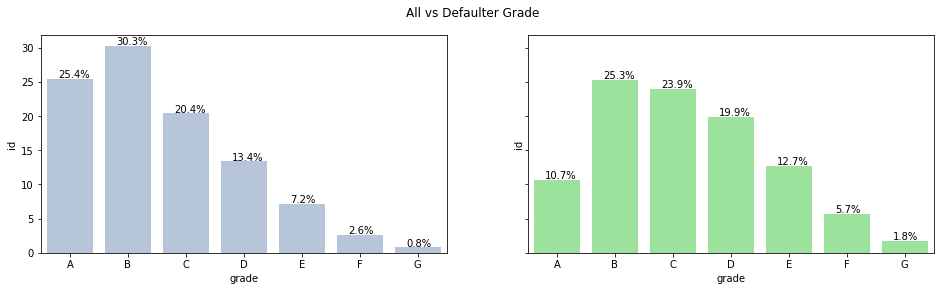

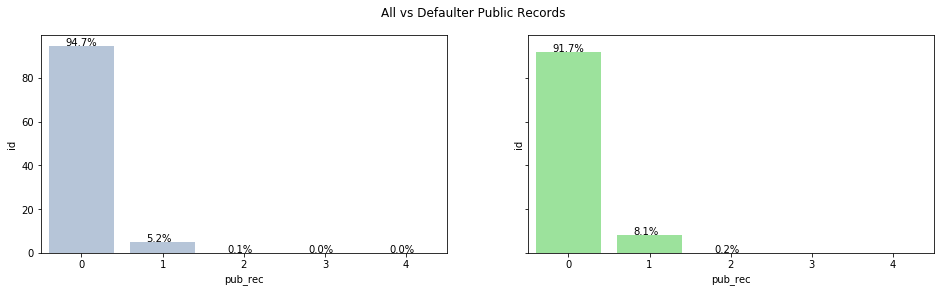

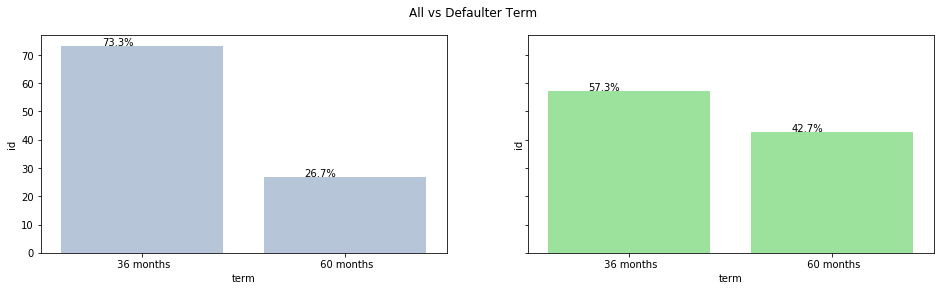

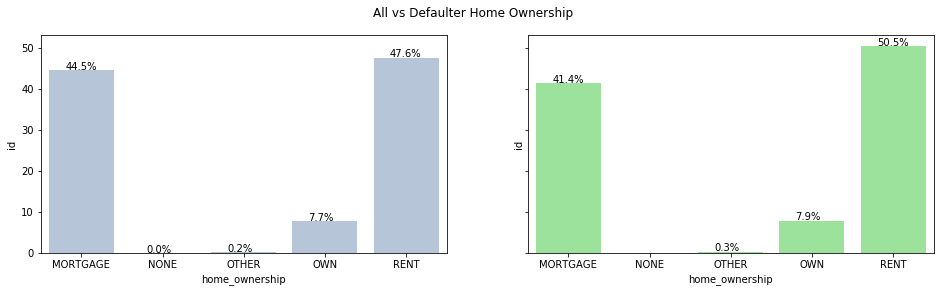

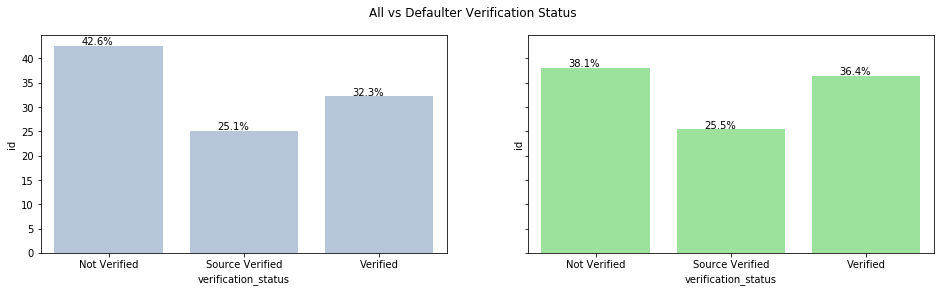

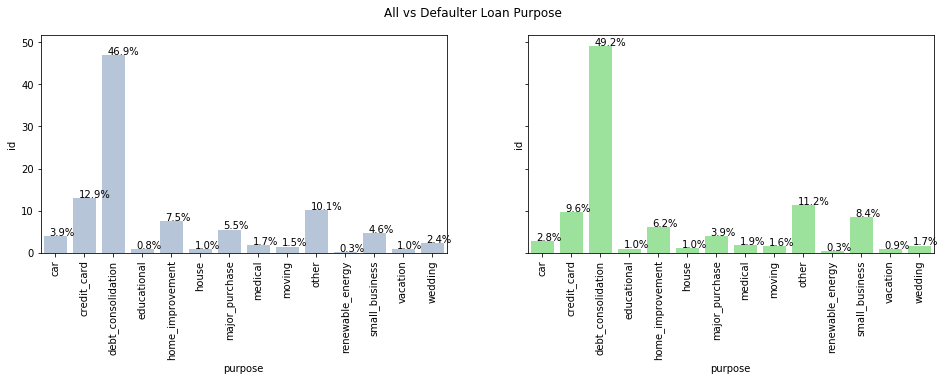

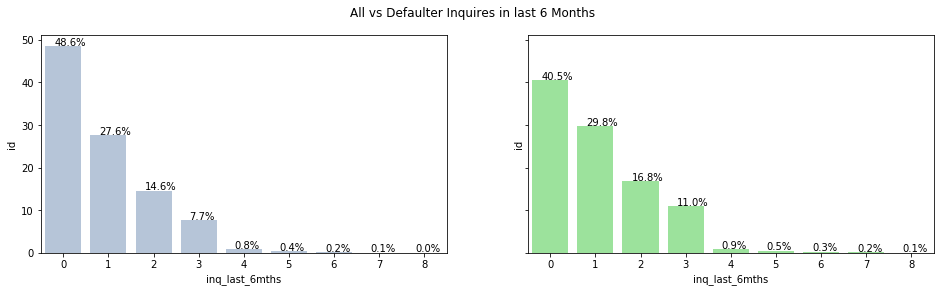

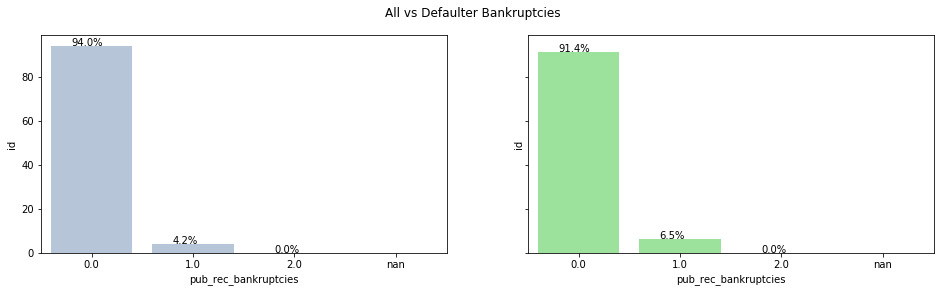

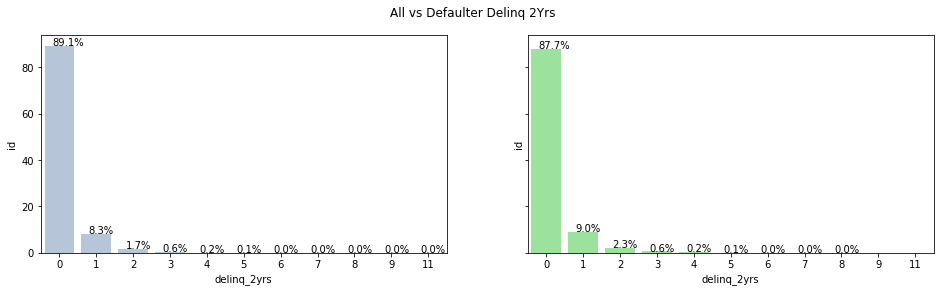

In [43]:
PlotBar(dfCust, dfCust_Defaulter, 'grade', title='All vs Defaulter Grade')
PlotBar(dfCust, dfCust_Defaulter, 'pub_rec', title='All vs Defaulter Public Records')
PlotBar(dfCust, dfCust_Defaulter, 'term', title='All vs Defaulter Term')
PlotBar(dfCust, dfCust_Defaulter, 'home_ownership', title='All vs Defaulter Home Ownership')
PlotBar(dfCust, dfCust_Defaulter, 'verification_status', title='All vs Defaulter Verification Status')
PlotBar(dfCust, dfCust_Defaulter, 'purpose',ticksRotation=90, title='All vs Defaulter Loan Purpose')
PlotBar(dfCust, dfCust_Defaulter, 'inq_last_6mths', title='All vs Defaulter Inquires in last 6 Months')
PlotBar(dfCust, dfCust_Defaulter, 'pub_rec_bankruptcies', title='All vs Defaulter Bankruptcies')
PlotBar(dfCust, dfCust_Defaulter, 'delinq_2yrs', title='All vs Defaulter Delinq 2Yrs')

- **Grade**: As expected **C, D & E** grade loan are contributing more towards defaulter as compare to total loans in same grade. But grade B also having significant number of defaulters **25.3%** from overall defaulters.
- **Term**: Loan tenure is also key point in defaulting, borrower with long term loans (60 Month) defaulting more than short term loan (36 Months)
- **Purpose**: **Debt consolidation** is major contributor in total loan as well as in defaulters, whereas **small business** loan also has more defaulters as compare to loan disbursement. 
- **Verified**: Surprisingly Verified loan accounts also defaulting more than Non-Verified account, have to analyze verification process.
- **Home Ownership**: Borrower with **rented accommodation** also contributing towards defaulter category.


### Quantitative Variable
** Plotting Frequency Distribution Plot **

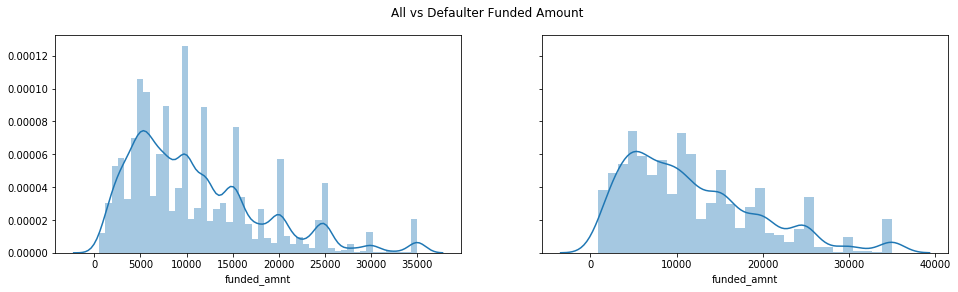

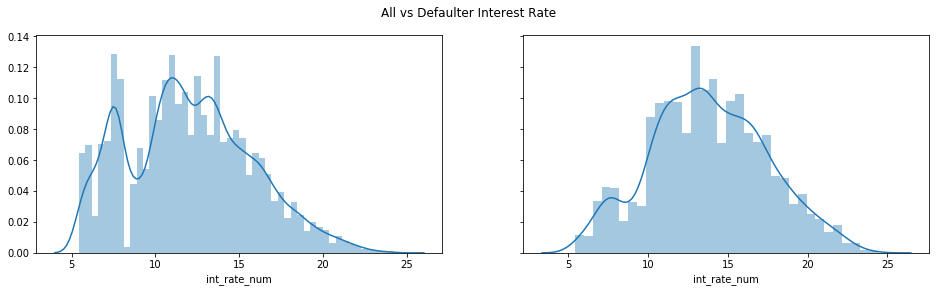

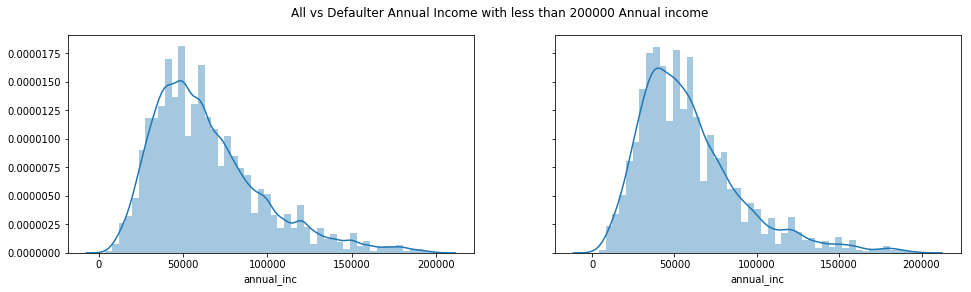

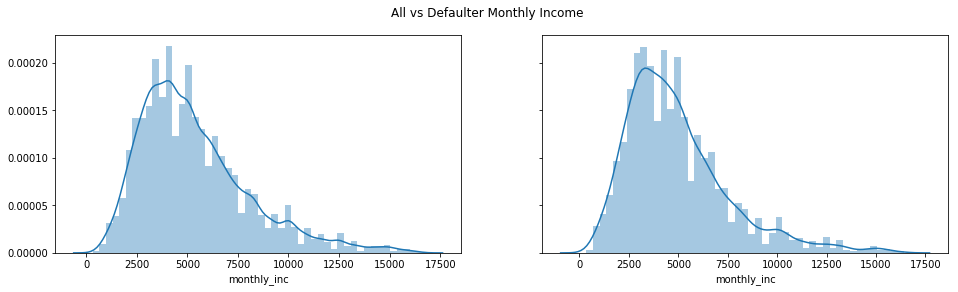

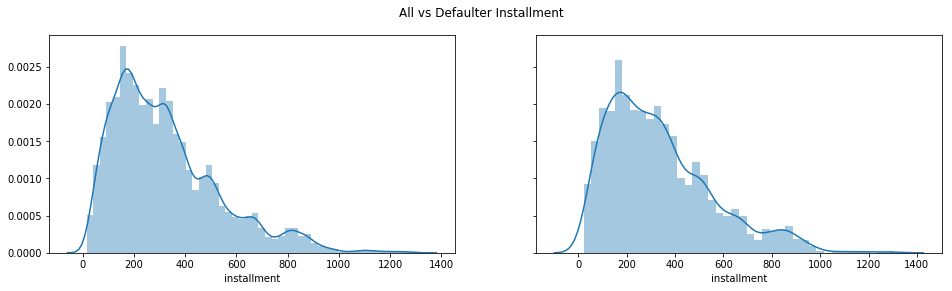

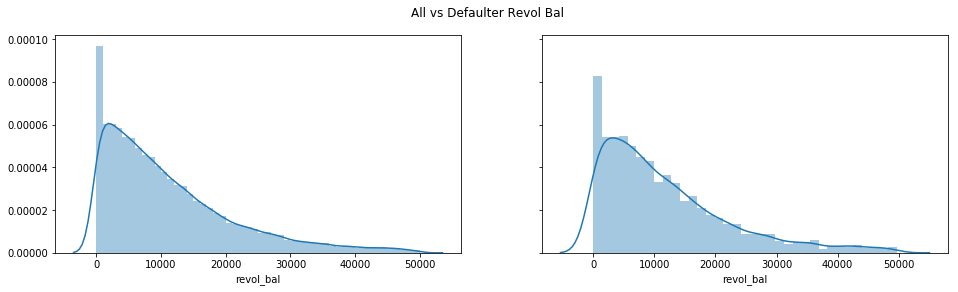

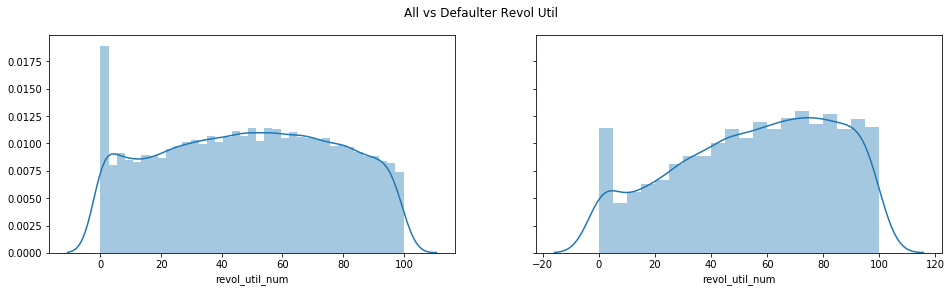

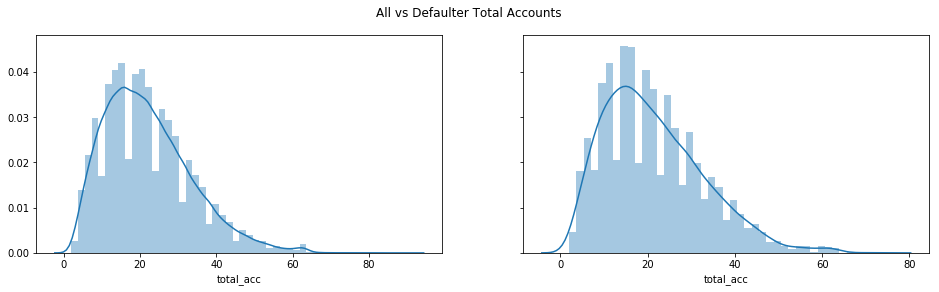

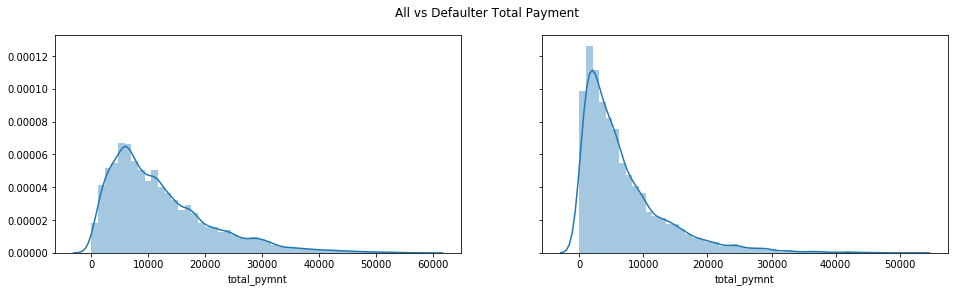

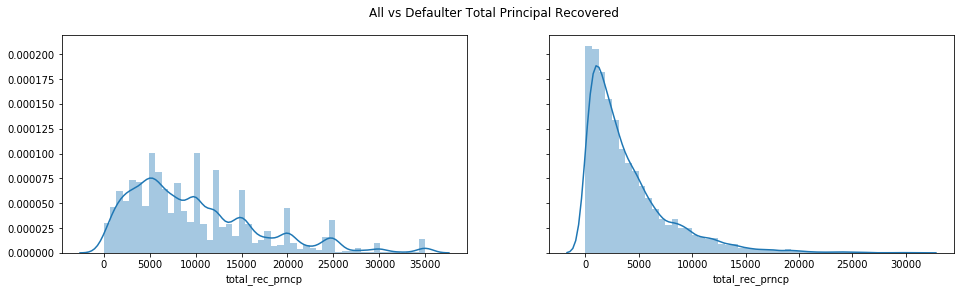

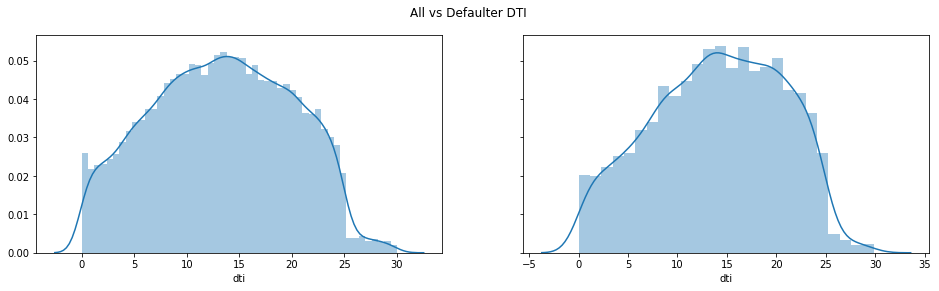

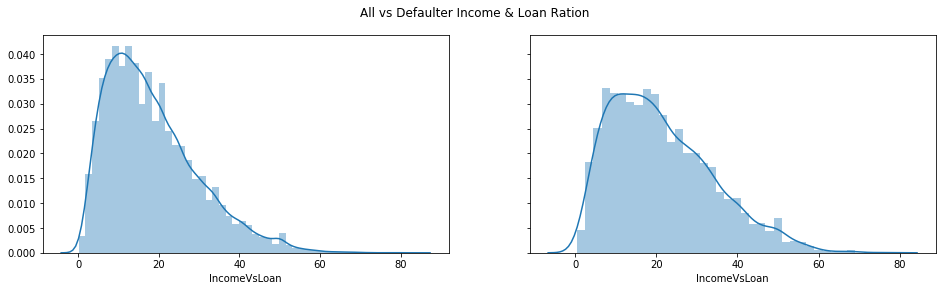

In [44]:
PlotFrequency(dfCust, dfCust_Defaulter, 'funded_amnt', title='All vs Defaulter Funded Amount')
PlotFrequency(dfCust, dfCust_Defaulter, 'int_rate_num', title='All vs Defaulter Interest Rate')

#Removing Outlier while plotting
PlotFrequency(dfCust[dfCust['annual_inc'] < 200000], dfCust_Defaulter[dfCust_Defaulter['annual_inc'] < 200000], 'annual_inc', title='All vs Defaulter Annual Income with less than 200000 Annual income')
PlotFrequency(dfCust[dfCust['monthly_inc'] < 200000/12], dfCust_Defaulter[dfCust_Defaulter['monthly_inc'] < 200000/12], 'monthly_inc', title='All vs Defaulter Monthly Income')
PlotFrequency(dfCust, dfCust_Defaulter, 'installment', title='All vs Defaulter Installment')

#Removing Outlier while plotting
PlotFrequency(dfCust[dfCust['revol_bal'] <= 50000], dfCust_Defaulter[dfCust_Defaulter['revol_bal'] <= 50000], 'revol_bal', title='All vs Defaulter Revol Bal')

PlotFrequency(dfCust, dfCust_Defaulter, 'revol_util_num',title='All vs Defaulter Revol Util')
PlotFrequency(dfCust, dfCust_Defaulter, 'total_acc',title='All vs Defaulter Total Accounts')
PlotFrequency(dfCust, dfCust_Defaulter, 'total_pymnt', title='All vs Defaulter Total Payment')
PlotFrequency(dfCust, dfCust_Defaulter, 'total_rec_prncp', title='All vs Defaulter Total Principal Recovered')
PlotFrequency(dfCust, dfCust_Defaulter, 'dti', title='All vs Defaulter DTI')
PlotFrequency(dfCust, dfCust_Defaulter, 'IncomeVsLoan', title='All vs Defaulter Income & Loan Ration')

- **Int Rate**: Accounts with low interest rates (0- 10 %) as well as high interest rate (>18 %) are performing well. More defaulters found in range of 10-18%
- **Annual Income**: Mid income group from 25000 to 60000 having more defaulters than income group.
- **Revol Util**: Higher the revol util number more is the risk, so plot shows same trend revol util, more than 60% of revol util having more defaulters  

### Quantitative Variable : Derived 
** Plotting Bar Plot **

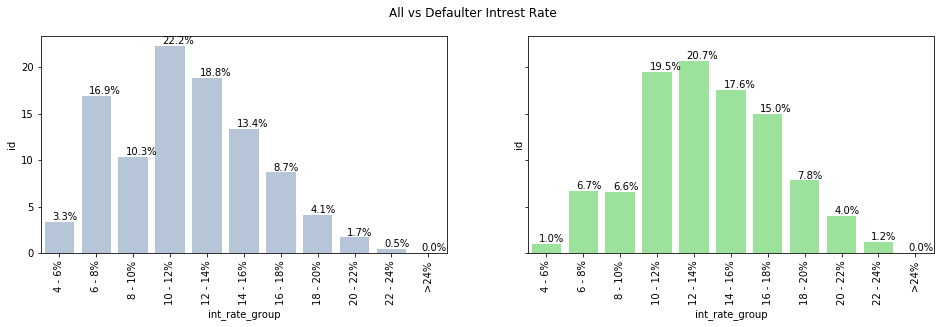

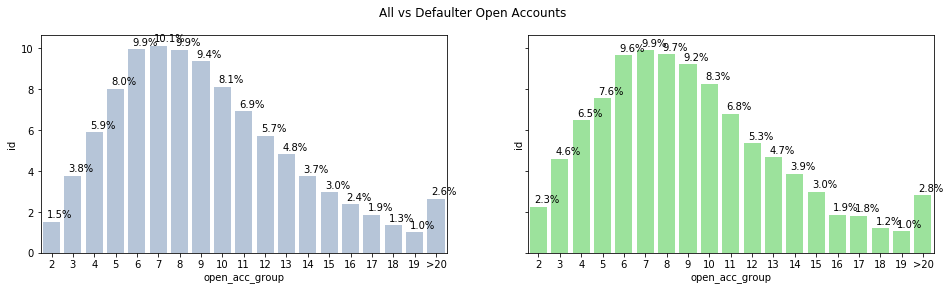

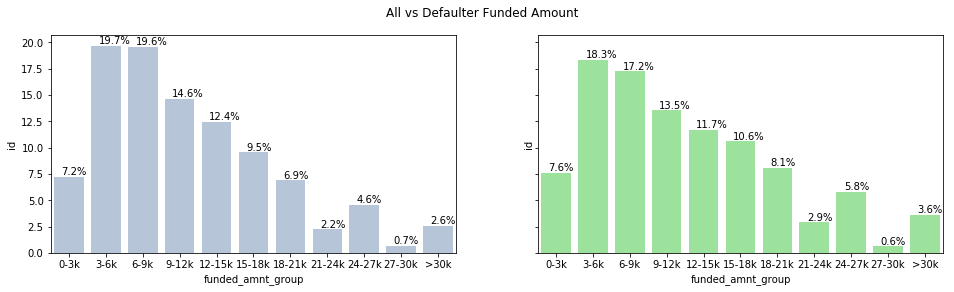

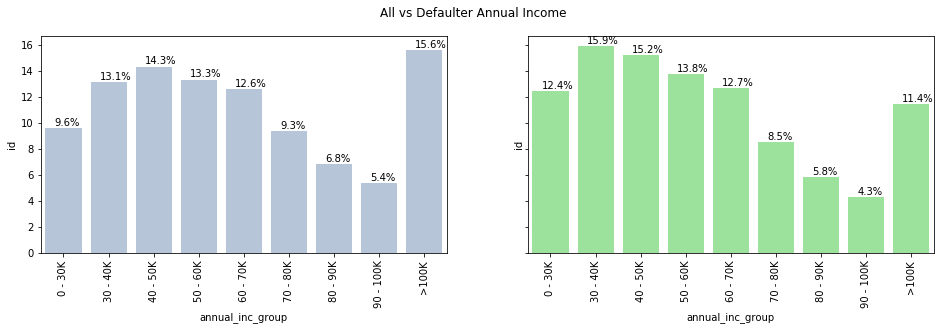

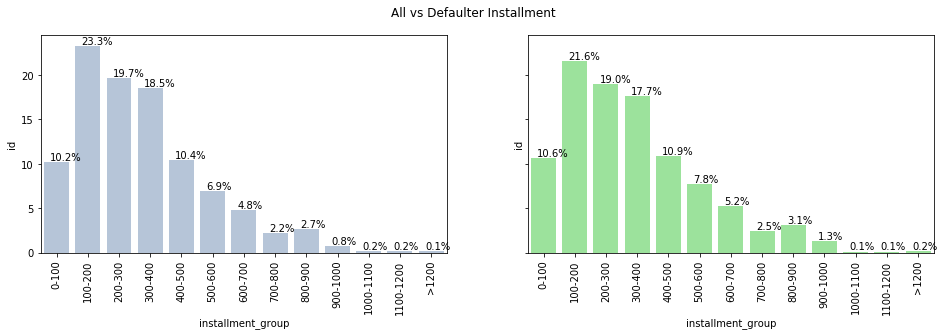

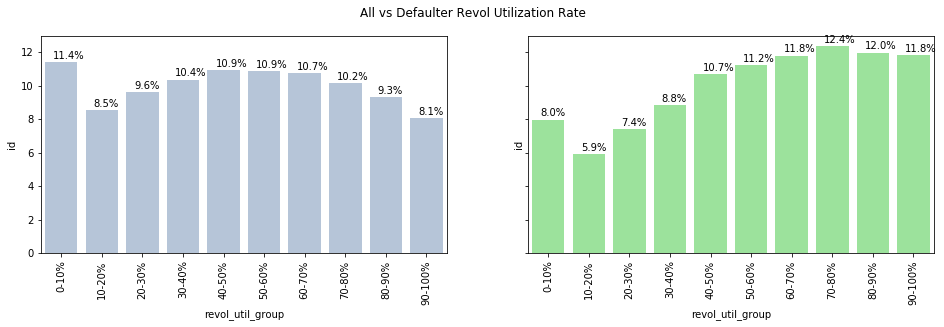

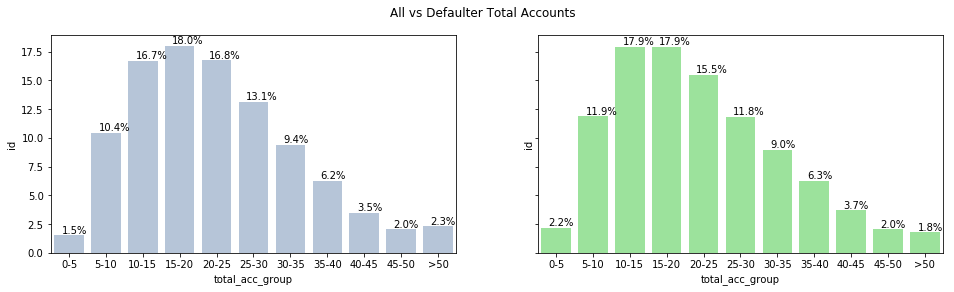

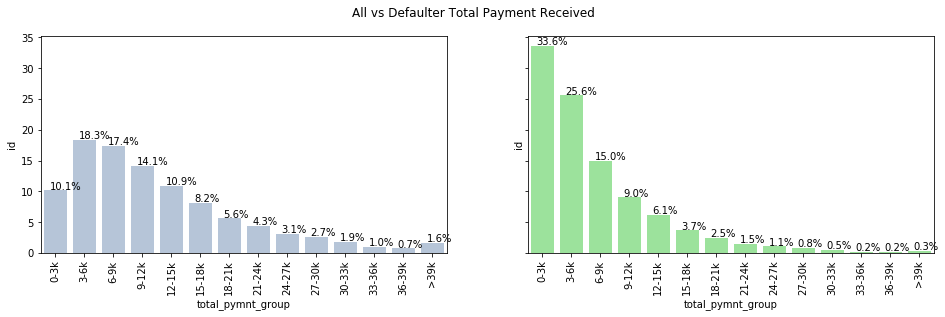

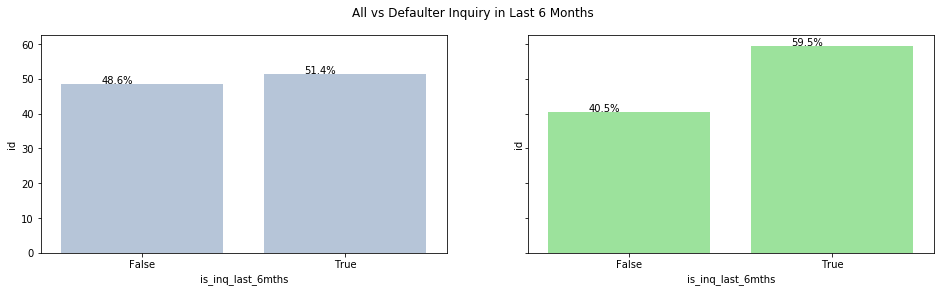

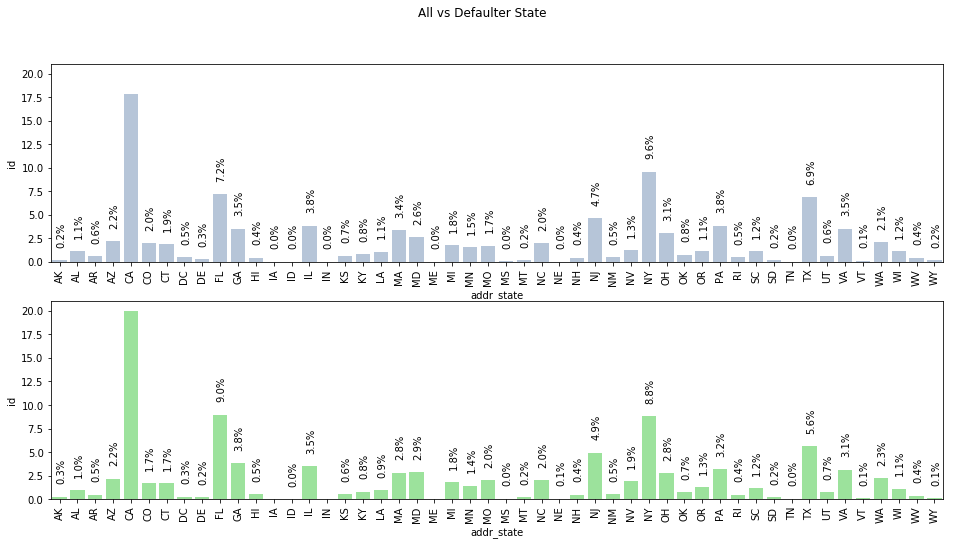

In [45]:
PlotBar(dfCust, dfCust_Defaulter, 'int_rate_group', title='All vs Defaulter Intrest Rate', ticksRotation=90)
PlotBar(dfCust, dfCust_Defaulter, 'open_acc_group', title='All vs Defaulter Open Accounts')
PlotBar(dfCust, dfCust_Defaulter, 'funded_amnt_group', title='All vs Defaulter Funded Amount')
PlotBar(dfCust, dfCust_Defaulter, 'annual_inc_group', title='All vs Defaulter Annual Income', ticksRotation=90)
PlotBar(dfCust, dfCust_Defaulter, 'installment_group', title='All vs Defaulter Installment', ticksRotation=90)
PlotBar(dfCust, dfCust_Defaulter, 'revol_util_group', title='All vs Defaulter Revol Utilization Rate', ticksRotation=90)
PlotBar(dfCust, dfCust_Defaulter, 'total_acc_group', title='All vs Defaulter Total Accounts')
PlotBar(dfCust, dfCust_Defaulter, 'total_pymnt_group', title='All vs Defaulter Total Payment Received', ticksRotation=90)
PlotBar(dfCust, dfCust_Defaulter, 'is_inq_last_6mths', title='All vs Defaulter Inquiry in Last 6 Months')
PlotBar(dfCust, dfCust_Defaulter, 'addr_state', rows=2, cols=1, figsize=(16,8), ticksRotation=90, valueRotation=90 , title= 'All vs Defaulter State')

## Bivariate Analysis

Plotting Date vs New Loan Disbursement & Defaulter trend

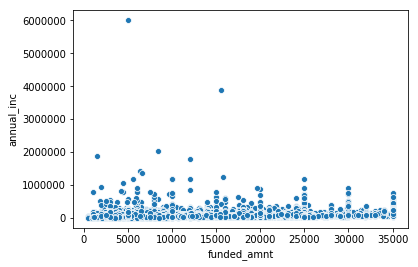

In [46]:
#Plotting Annual income against Funded Amount. 
sns.scatterplot(x='funded_amnt', y='annual_inc', data=dfCust)
plt.show()

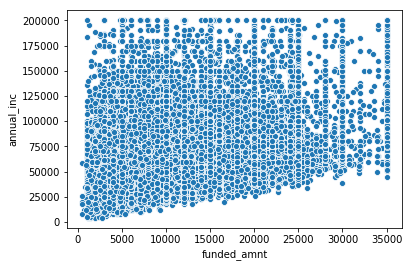

In [47]:
#Remove Annual Income Outlier values 
sns.scatterplot(x='funded_amnt', y='annual_inc', data=dfCust[(dfCust['annual_inc'] <= 200000)])
plt.show()

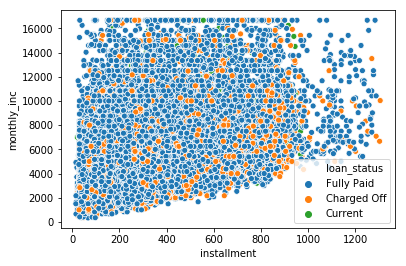

In [48]:
sns.scatterplot(data=dfCust[(dfCust['annual_inc'] <= 200000)], x='installment', y='monthly_inc', hue='loan_status')
plt.show()

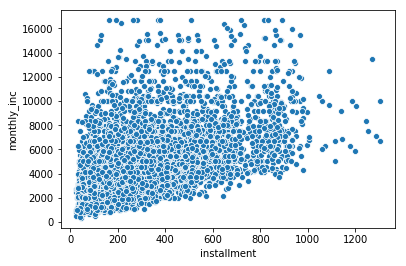

In [49]:
sns.scatterplot(data=dfCust_Defaulter[(dfCust_Defaulter['annual_inc'] <= 200000)], x='installment', y='monthly_inc')
plt.show()

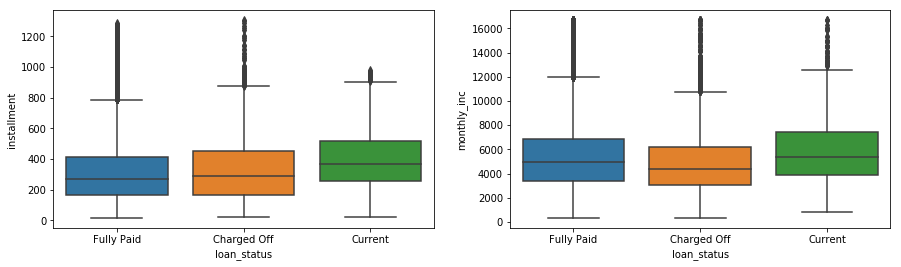

In [50]:
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=dfCust[(dfCust['annual_inc'] <= 200000) ] , y='installment' , x ='loan_status', ax=ax1 )
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=dfCust[(dfCust['annual_inc'] <= 200000) ] , y='monthly_inc' , x ='loan_status', ax=ax2)
plt.show()

** Median Monthly Income of Defaulter group is slightly less than Fully Paid or Current Account **

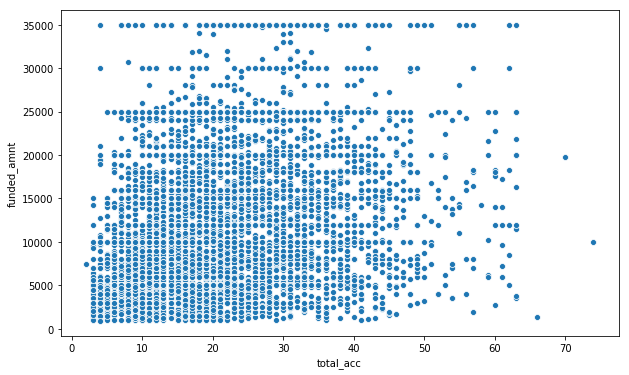

In [51]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfCust_Defaulter, x='total_acc', y='funded_amnt')
plt.show()

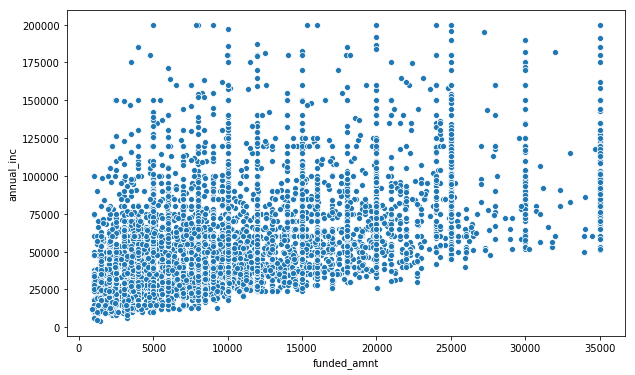

In [52]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dfCust_Defaulter[(dfCust_Defaulter['annual_inc'] <= 200000)], x='funded_amnt', y='annual_inc')
plt.show()

Borrower with annual income of **75000** or less has more chance of defaulting

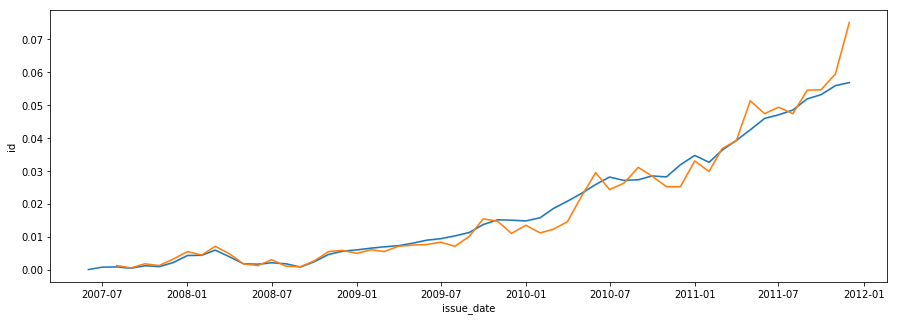

In [53]:
plt.figure(figsize=(15,5))
sns.lineplot(data=dfCust, x='issue_date', y='id', estimator=lambda x: len(x) / len(dfCust))
sns.lineplot(data=dfCust_Defaulter, x='issue_date', y='id', estimator=lambda x: len(x) / len(dfCust_Defaulter))
plt.show()

 Interest rate & Term loans are driving factor for loan defaulting.<Br>

In [56]:
tempDFAll = dfCust.pivot_table(values='id' , aggfunc=lambda x: round(len(x) / len(dfCust)  * 100), index=['int_rate_group','term_num'])
tempDFDefaulter = dfCust_Defaulter.pivot_table(values='id' , aggfunc=lambda x: round(len(x) / len(dfCust_Defaulter)  * 100), index=['int_rate_group','term_num','IsChargedOff'])
tempDFAll.reset_index(inplace=True)
tempDFDefaulter.reset_index(inplace=True)
tempDF = tempDFAll.append(tempDFDefaulter).fillna(value='False')

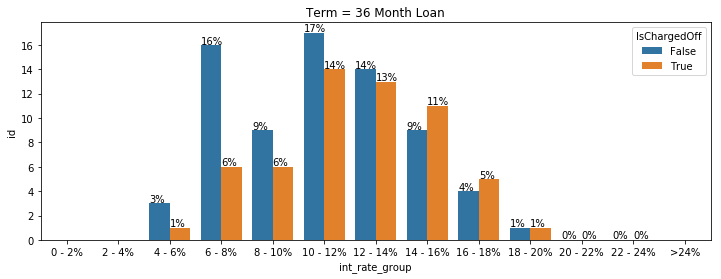

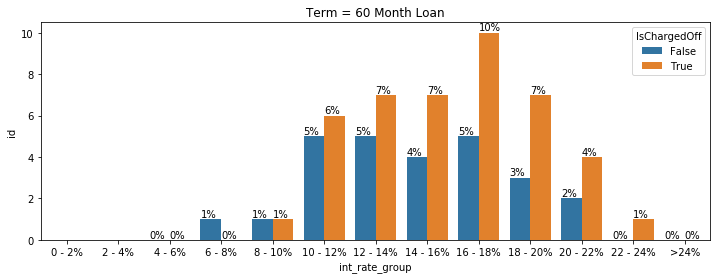

In [55]:
sortOrder = sorted(rateRange.keys(), key=sort_keys)

plt.figure(figsize=(12,4))
ax = sns.barplot(data=tempDF[tempDF['term_num'] == 36], x='int_rate_group', y='id', hue='IsChargedOff', order=sortOrder, ci=None)
for p in ax.patches:
    height = p.get_height()
    ax.annotate('%.0f' % height + "%",(p.get_x(), height + 0.1)) 

ax.set_title ('Term = 36 Month Loan')
plt.show()

plt.figure(figsize=(12,4))
ax1 = sns.barplot(data=tempDF[tempDF['term_num'] == 60], x='int_rate_group', y='id', hue='IsChargedOff', order=sortOrder, ci=None)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate('%.0f' % height + "%",(p.get_x(), height + 0.1)) 

ax1.set_title ('Term = 60 Month Loan')
plt.show()

Long term loan (60 month) having more defaulters than short term loan (36 month).<BR>
Within 60 month term loan, borrowers with intrest rate ranging from 12 To 20 contributting more towards defaulter. With clear peak at 16-18% interest rate.

## Final Analysis

- Customer with total payment **less than 6k** is impacting the charged off % by **31%** 
- Loans with the interest rate between **12 to 22 %** is driving the charged off loans by **18%**
- Loan tenure of **60 months** is impacting the charged off loans by **16%** 
- Borrowers with revolving credit percentage **greater than 60%** has an impact of **10%** 
- Borrowers with **1 to 3** inquires in past 6 months is impacting charged off loans by **8%** 
- Borrowers with annual income **less than 60k** is driving the charged off % by **7%** 
- **Others** and **small_business** loans are impacting the charged off loans by **5%** 
- **CA** and **FL** jointly impact the charged off loan % by **4%** 
